# ExtraaLearn Project

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. The folowing are the objectuves of this project;
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert

## What did I do
* Data Cleaning
* EDA
* Data Preprocessing
* Feature engineering
* Feature selection and removing of multicollinerity.
* Built a Decision Tree and Random Forest machine learning classification model
* Evaluated the model performance
* Suggested actionable bussines recommendations


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset
learn = pd.read_csv("/content/drive/MyDrive/Project/ExtraaLearn.csv")

In [4]:
#learn = pd.read_csv("ExtraaLearn.csv") ##  Complete the code to read the data

In [5]:
# Here we make a copy of the data and save it in other variable in order to preseve the original data set for reference
data = learn.copy()

In [6]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [7]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


#### observations:

1. The Dataframe has 15 colunms representing 15 different deatures
2. The number of rows are 4612 with different data types raning from numrical, categorical and binary

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

#### Observations:

1. The data contains attributes of different types (int, float and object)
2. All columns have 4612 observations indicating no null observations


In [9]:
# Checking unique values in each column
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

#### Observations:

1. There are 4612 unique lead **IDs** suggesting all leads are given unique IDs
2. There are 46 unique **age** groups among the leads
3. There are 3 unique groups of **current_occupation**
4. The **first_interaction** has 2 unique modes of interacting with the ExtraLearn
5. **Profile_completed** which represents the percentage of the profile filled by the lead on the website/mobileApp is in 3 unique categories
6. There are 27 unique **website_visits** made by the lead
7. There are 1623 unique **time_spent_on_website**
8. The **page_views_per_visit** has 2414 unique entries
9. There are 3 unique **Last_activity** performed by the lead#
10. Tere are only 2 unique **print_media_type1** and **print_media-type2** stating which media outlrt newspaper or magazine flaging whether the lead had sen the add
11. The **digital_media** has two unique sources
12. There are 2 unique **educational_channels**
13. There are 2 unique lead **referral**
14. The dependent variable **Status** has two unique outcomes.

### checking the shape of the data and data types of the columns


In [10]:
data.shape

(4612, 15)

### observations:

1. The data consist of **4612** rows and **15** columns


In [11]:
data.dtypes

ID                        object
age                        int64
current_occupation        object
first_interaction         object
profile_completed         object
website_visits             int64
time_spent_on_website      int64
page_views_per_visit     float64
last_activity             object
print_media_type1         object
print_media_type2         object
digital_media             object
educational_channels      object
referral                  object
status                     int64
dtype: object

#### Observations:

1. The data set comprise of different data types including integers, floats and objects
2. The dependent variable **Status** is binary with zeros and ones

### Observations:

In [12]:
# Checking missing values
#df.isna().sum()
data.isnull().values.any()

False

#### Observations:

The output of the above code (**False**) implies that **there are no missing values in the data**.

In [13]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4607    False
4608    False
4609    False
4610    False
4611    False
Length: 4612, dtype: bool

In [14]:
# Let's check for duplicate values in the data
data.duplicated().sum()

0

In [15]:
# Check for duplicates
duplicates = data.duplicated()

# Display rows with duplicates
print("Rows with duplicates:")
print(data[duplicates])

# Display unique rows
print("\nUnique rows:")
print(data[~duplicates])

Rows with duplicates:
Empty DataFrame
Columns: [ID, age, current_occupation, first_interaction, profile_completed, website_visits, time_spent_on_website, page_views_per_visit, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral, status]
Index: []

Unique rows:
           ID  age current_occupation first_interaction profile_completed  \
0      EXT001   57         Unemployed           Website              High   
1      EXT002   56       Professional        Mobile App            Medium   
2      EXT003   52       Professional           Website            Medium   
3      EXT004   53         Unemployed           Website              High   
4      EXT005   23            Student           Website              High   
...       ...  ...                ...               ...               ...   
4607  EXT4608   35         Unemployed        Mobile App            Medium   
4608  EXT4609   55       Professional        Mobile App            Medium   

### Observations:

There are 14 duplicated rows, however these rows have unique ID suggesting the observations are correct and do not require data treatment

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### **Univariate analysis of numerical columns**

In [16]:
# Dropping the columns
data=data.drop(['ID'],axis=1)

In [17]:
# Creating numerical columns
num_cols=["age","website_visits","time_spent_on_website","page_views_per_visit","status"]

# Creating categorical variables
cat_cols= ["current_occupation","first_interaction","profile_completed",
           "last_activity","print_media_type1","print_media_type2",
          "digital_media","educational_channels","referral"]

In [18]:
# Checking summary statistics
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


### Observations:

1. The average age of the lead is 46 and it has a wide range from 18 to 63 years.
2. On average, leads visit the website three times, and 75% of the leads visit the website five times or fewer. The maximum number of times a lead visits the website is 30, which is six times higher than 75% of the data, suggesting the presence of outliers in this dataset.
3. On average, leads spend a total of 724 times on the website. However, it's worth noting that there are some leads who do not visit the website at all. The distribution of website visits appears to be bimodal.
4. On average, leads tend to view approximately 3 pages during their website visits, with 75% of the leads viewing nearly 4 pages or fewer per visit. Additionally, some leads, who don't visit the website at all, do not view any pages.

**Exploring the numerical variables in some more depth by observing their distributions**

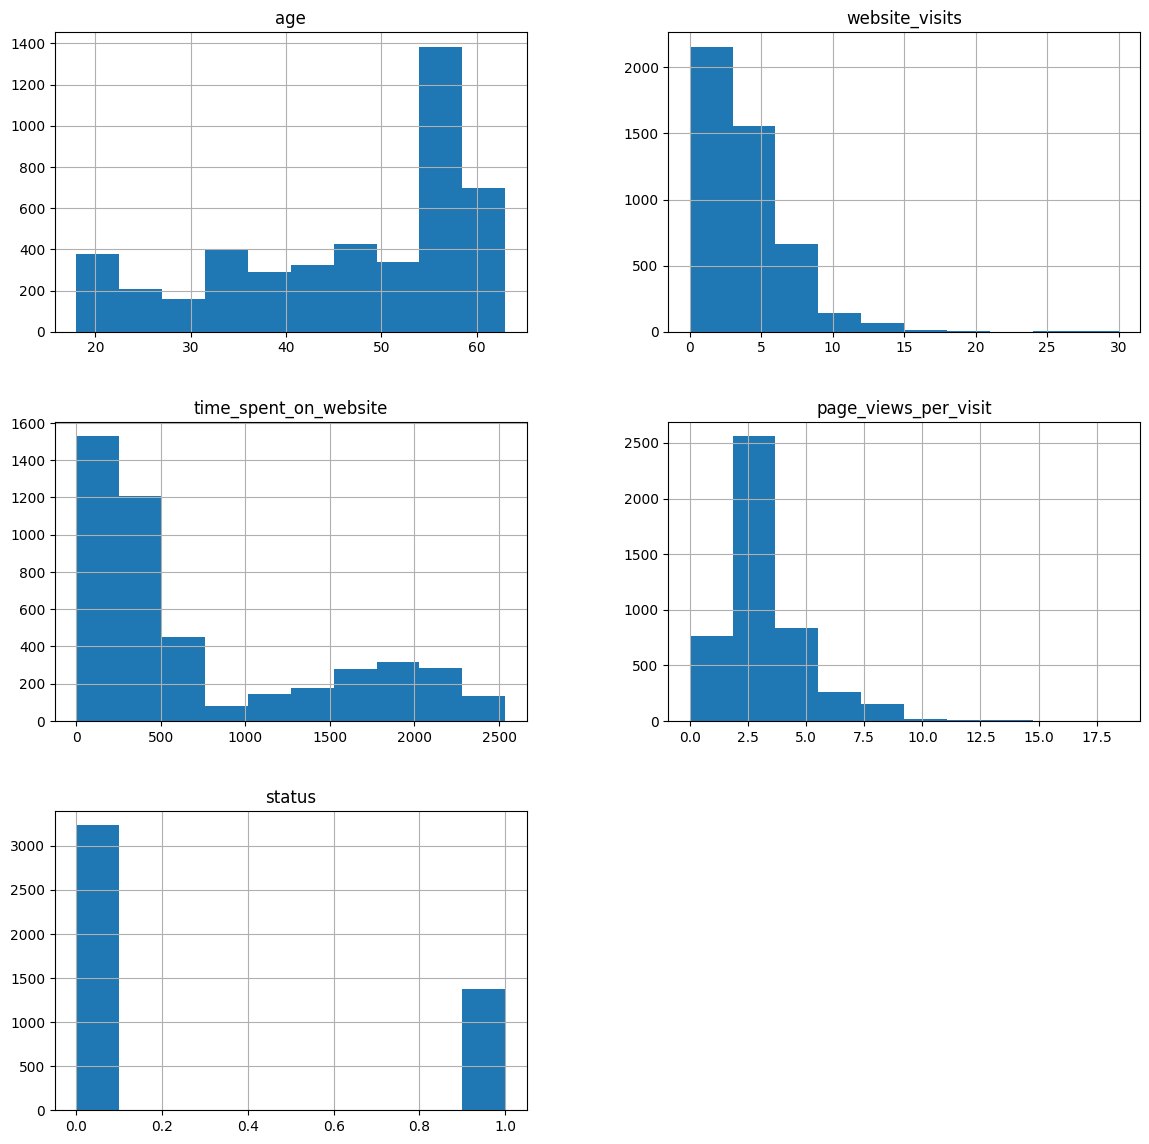

In [19]:
# Creating histograms
data[num_cols].hist(figsize=(14,14))
plt.show()

### Observations:
1. The age distribution of the leads is skewed to the left, indicating that the majority of leads are older, particularly between 55 and 65 years.
2. The distribution of the number of times a lead visits the website (website_visits) is right-skewed, suggesting that most leads do not sisit the website regularly. The majority of leads have a frequency of visits falling within 0 and 5 times.
3. The distribution of the time_spend_on_website is bimodal with two peaks, indicating two populations in the time spent on the website. The first category of leads spends between 0 and 500 units of time on the website, while the other category of leads spends between 1500 and 2250 units of time on the website.
4. The distribution of page_views_per_visit is slightly skewed to the right. Most of the leads view between 2 and 3 pages per visit.
5. There are more 0 outcomes in the status indicating majoruty of the leads were not converted to a paid customer.

### **Univariate analysis for categorical variables**

In [20]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(data[i].value_counts(normalize=True))
    print(data[i].value_counts())
    print('*'*40)
    print('*'*40)

Professional   0.56722
Unemployed     0.31245
Student        0.12034
Name: current_occupation, dtype: float64
Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
****************************************
****************************************
Website      0.55117
Mobile App   0.44883
Name: first_interaction, dtype: float64
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
****************************************
****************************************
High     0.49089
Medium   0.48591
Low      0.02320
Name: profile_completed, dtype: float64
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
****************************************
****************************************
Email Activity     0.49393
Phone Activity     0.26756
Website Activity   0.23851
Name: last_activity, dtype: float64
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activit

### Observations:

1. In terms of the current occupation of the leads, 57% are professionals, 31.2% are unemployed, and 12% are students.
2. About 55% of the leads first interacted with the ExtraLearn via Website while 45% used the Mobile App medium.
3. The percentage of the lead's profile filled on the website/mobile app indicates 49% high, 49% medium, and 2.3% low.
4. The majority of the last interactions between the leads and ExtraaLearn were via Email activity (49%), followed by Phone activity (27%) and website activity (24%), respectively.
5. Approximately 89% of the leads recorded "no," indicating that they had not seen the ad for ExtraaLearn in the Newspaper regarding print_media_type1.
6. Around 95% of the leads recorded "no," indicating that they had not seen the ad for ExtraaLearn in the Magazine regarding print_media_type2.
7. Only 11% of the leads had seen the ad in the digital platform
8. Only 15% of the leads had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.

In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on age

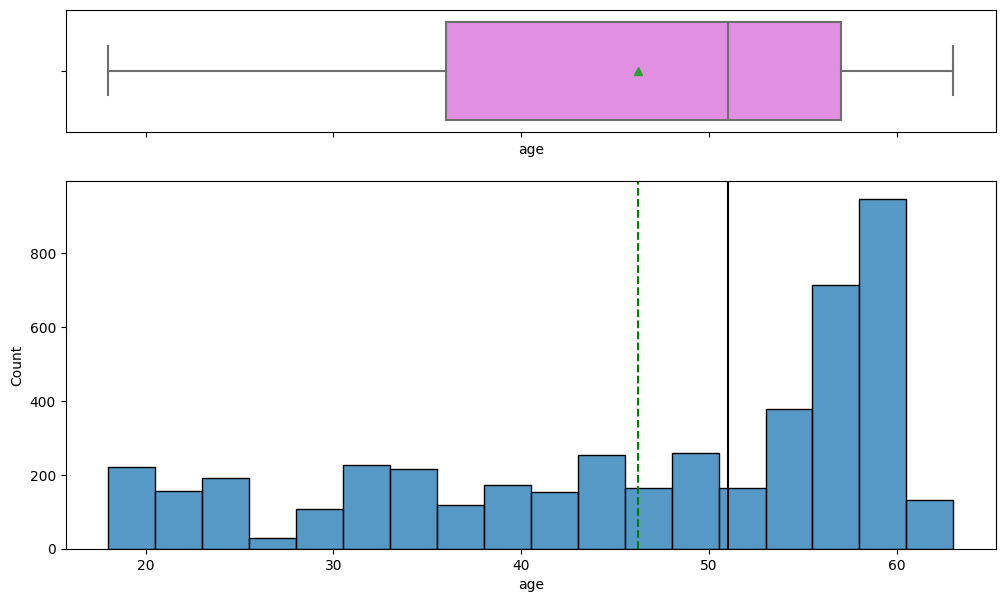

In [22]:
histogram_boxplot(data, "age")

### Observations on website_visits

1. The boxplot reveals a distribution skewed to the left, with distinct mean and median values, suggesting that the distribution deviates from normality.
2. No outliers are present in this particular feature.

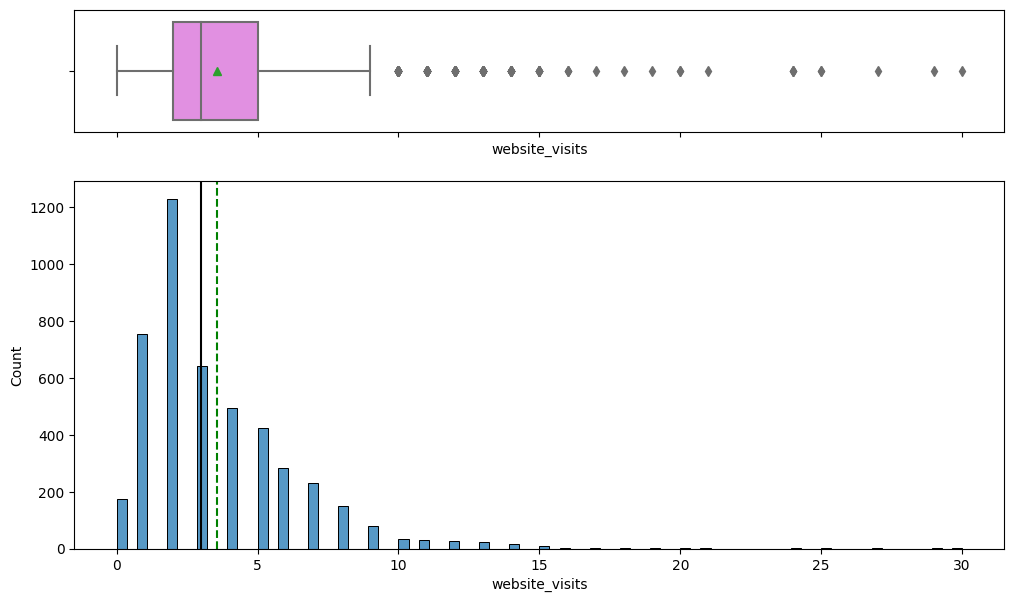

In [20]:
histogram_boxplot(data, "website_visits") # Complete the code to plot a histogram_boxplot for website_visits

### observations:

1. The distribution exhibits a rightward skew, indicating a departure from normality.
2. Notably, there are identifiable points that qualify as outliers.

In [21]:
# To check how many leads have not visited web-site
data[data["website_visits"] == 0].shape

(174, 14)

### Observations:

 There are 174 leads that have not visited the website.

### Observations on number of time_spent_on_website

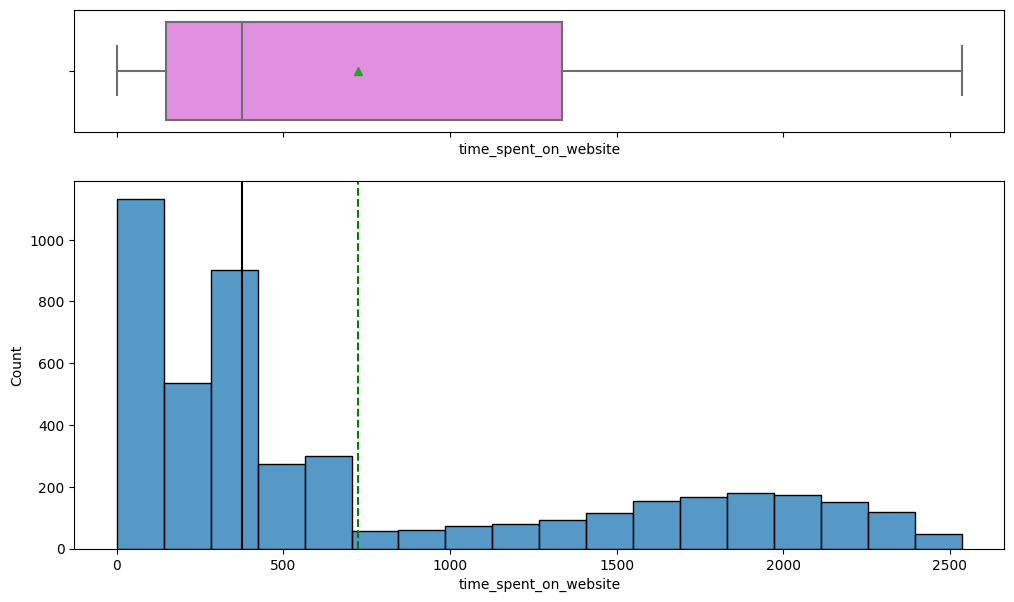

In [22]:
histogram_boxplot(data, "time_spent_on_website") # Complete the code to plot a histogram_boxplot for time_spent_on_website

### Observations:

1. The distribution displays bimodal characteristics with two distinct peaks, and the boxplot indicates a rightward skew.
2. No outliers are evident within this dataset.

### Observations on number of page_views_per_visit

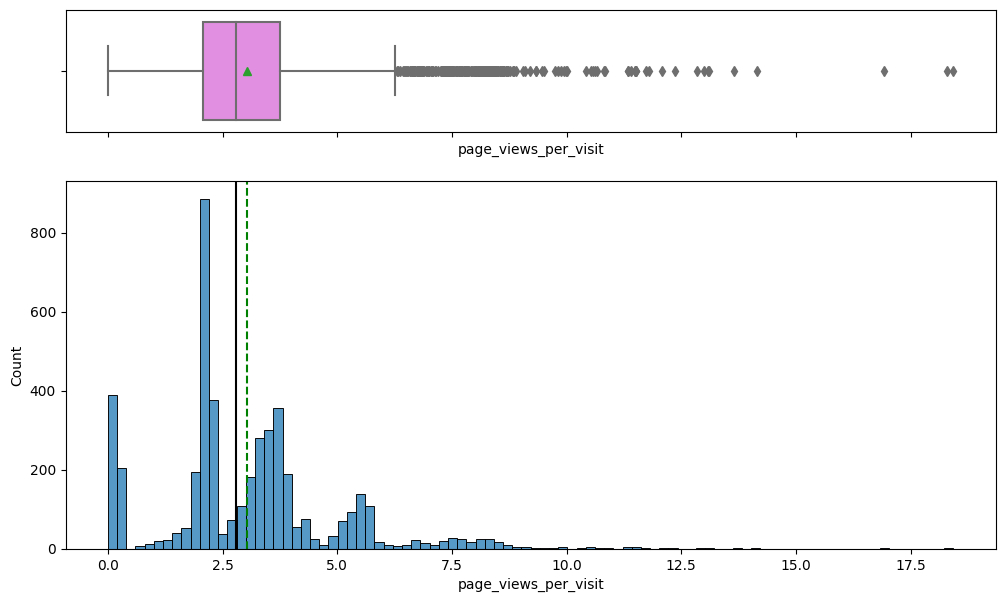

In [23]:
histogram_boxplot(data, "page_views_per_visit") # Complete the code to plot a histogram_boxplot for page_views_per_visit

### Observations:

1. This feature exhibits approximately five distinct populations, each representing different peak values.
2. The boxplot illustrates a rightward skew in the data, accompanied by a notable presence of outliers.

In [24]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on current_occupation

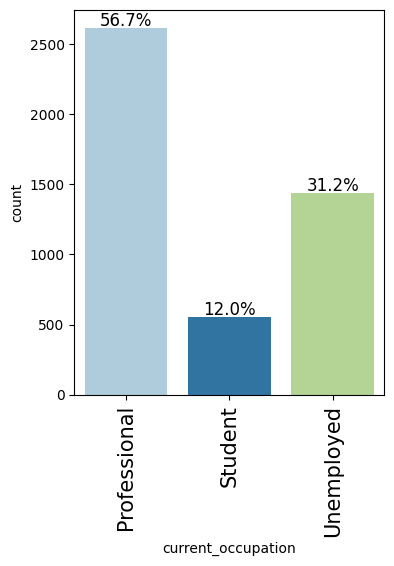

In [25]:
labeled_barplot(data, "current_occupation", perc=True)

### observations:

Professionals make up around 57% of the leads, while the unemployed constitute 31%, and students account for the remaining 12%.








### Observations on number of first_interaction

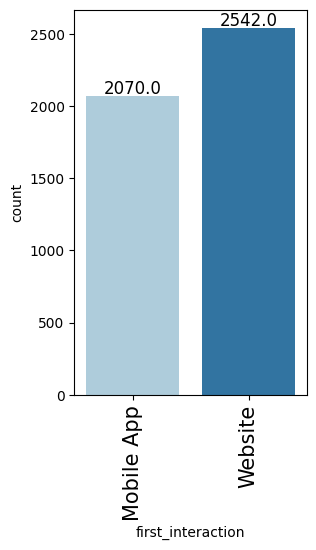

In [26]:
labeled_barplot(data, "first_interaction") # Complete the code to plot labeled_barplot for first_interaction

### Observations on profile_completed

A collective total of 2542 leads initially engaged with ExtraLearn through the website, whereas 2070 leads opted for the Mobile App.

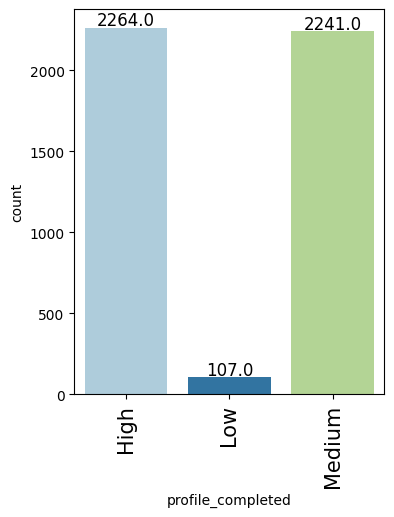

In [27]:
labeled_barplot(data, "profile_completed") # Complete the code to plot labeled_barplot for profile_completed

### observations:

The count of completed profiles is nearly identical for both the high and medium categories, with only 107 leads falling into the low category.

### Observations on last_activity

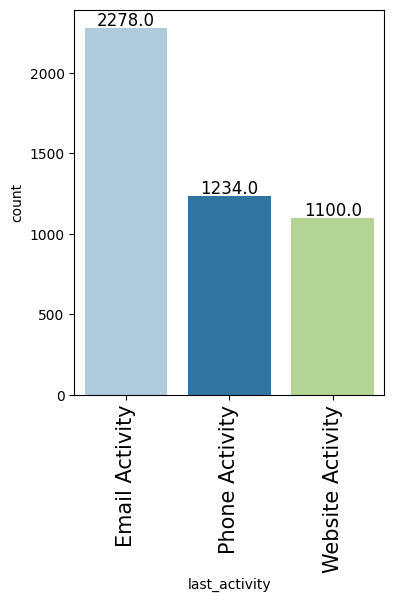

In [28]:
labeled_barplot(data, "last_activity") # Complete the code to plot labeled_barplot for last_activity

### observations:

The most common mode of interaction for leads in their last engagement with ExtraLearn is through email activity.

### Observations on print_media_type1

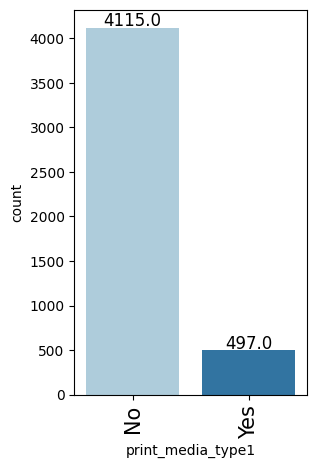

In [29]:
labeled_barplot(data, "print_media_type1") # Complete the code to plot labeled_barplot for last_activity

### observations:

A total of 4115 of the leads did not see ad via newspaper.

### Observations on print_media_type2

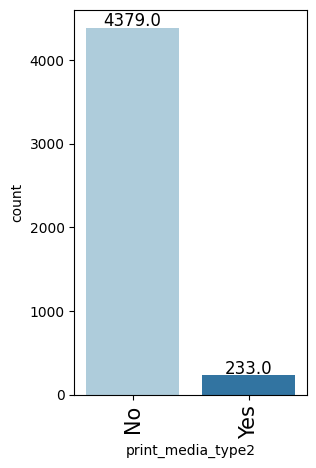

In [30]:
labeled_barplot(data, "print_media_type2") # Complete the code to plot labeled_barplot for last_activity

### observations:

Only a handful of the leads saw the ad via magazine

### Observations on digital_media

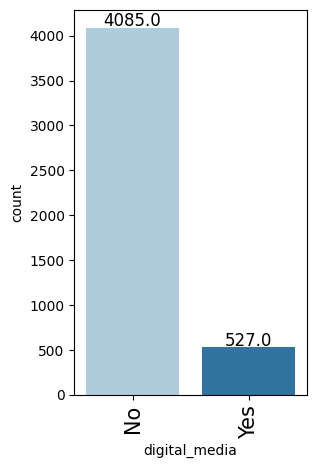

In [31]:
labeled_barplot(data, "digital_media") # Complete the code to plot labeled_barplot for last_activity

### observations:

The majority of leads did not encounter the ad via digital media; only a handful observed it through this channel.

### Observations on educational_channels

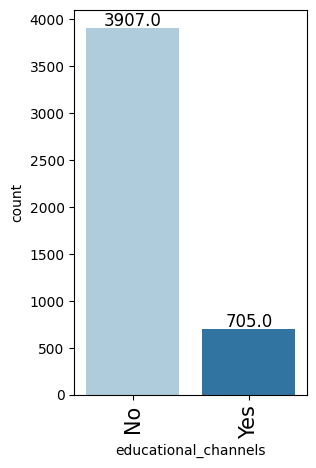

In [32]:
labeled_barplot(data, "educational_channels") # Complete the code to plot labeled_barplot for last_activity

### observations:

705 leads viewed the ad through educational channels, while 3907 did not have exposure to it through such channels.

### Observations on referral



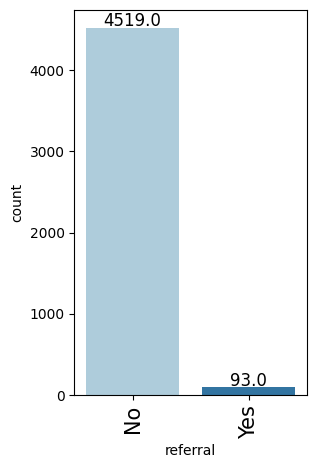

In [33]:
labeled_barplot(data, "referral") # Complete the code to plot labeled_barplot for last_activity

### observations:

Only 93 leads learned about ExtraLearn through a referral.

### Observations on status

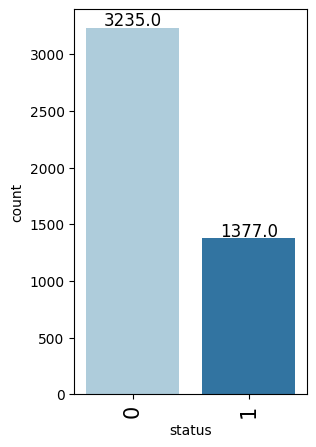

In [34]:
labeled_barplot(data, "status") # Complete the code to plot labeled_barplot for last_activity

### observations:

The dependent variable reveals that 3235 leads did not convert to paid customers, whereas 1377 leads successfully converted, indicating an uneven distribution of the binary outcome.

### **Bivariate and Multivariate analysis**

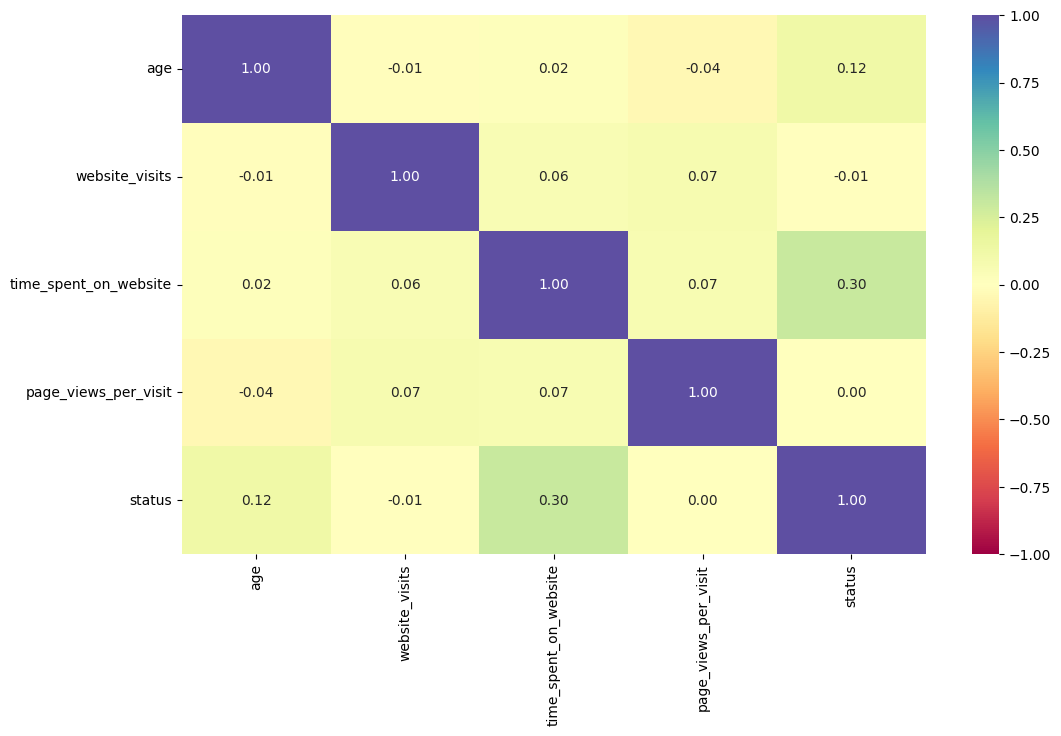

In [35]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### observations:

1. The dependent variable "status" exhibits a slight positive correlation with the time spent on the website.
2. There seems to be no significant correlation among the numerical variables, including age, page views per visit, and website visits.

In [36]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [37]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


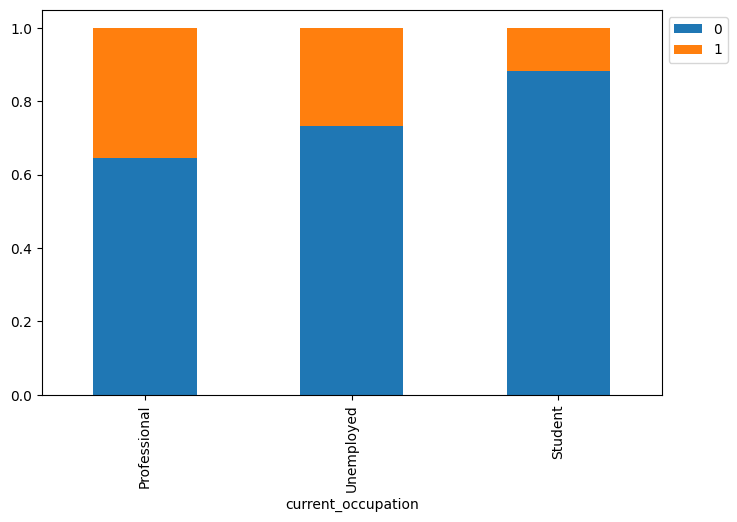

In [38]:
stacked_barplot(data, "current_occupation", "status")

### observations:

Professionals tend to have a higher likelihood of converting to paid customers compared to individuals in other occupations, while students exhibit a lower probability of being converted into paid customers.

**Age can be a good factor to differentiate between such leads**

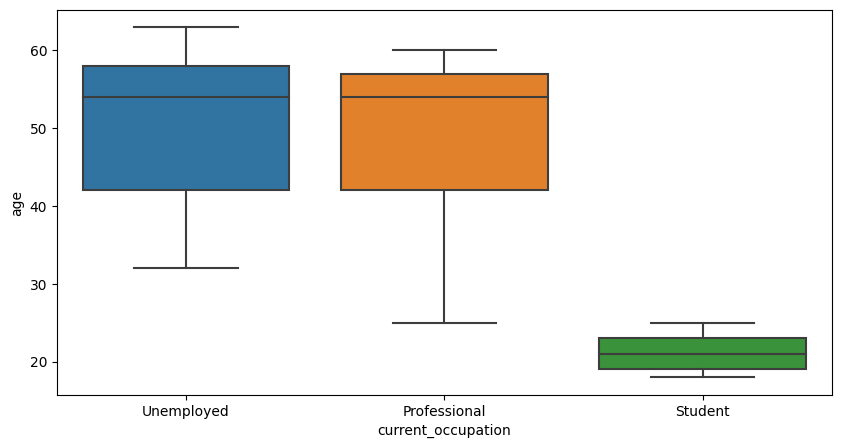

In [39]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x = data["current_occupation"], y = data["age"])
plt.show()

### observations:


The average age for both unemployed and professional occupations is similar, hovering around 55 years. Conversely, students tend to fall within the lower age group.

In [40]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


**The company's first interaction with leads should be compelling and persuasive. Let's see if the channels of the first interaction have an impact on the conversion of leads**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


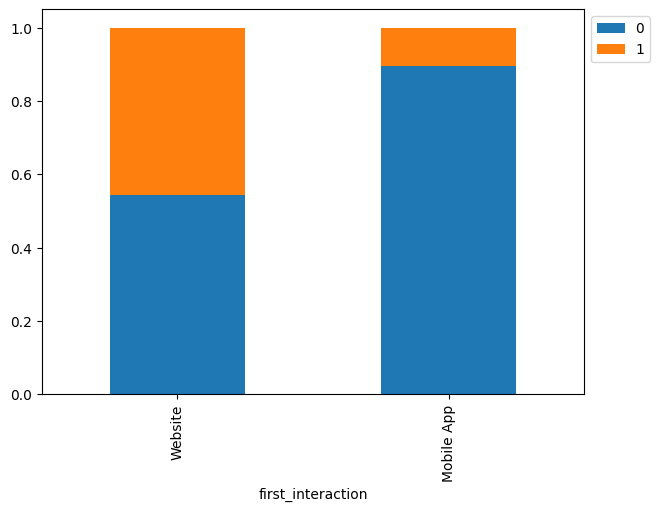

In [41]:
stacked_barplot(data, "first_interaction", "status") # Complete the code to plot stacked_barplot for first_interaction and status

### observations:

Just over 40% of leads who initially engaged with ExtraLearn through the website were converted into paid customers, a percentage higher than those who interacted through the mobile app.


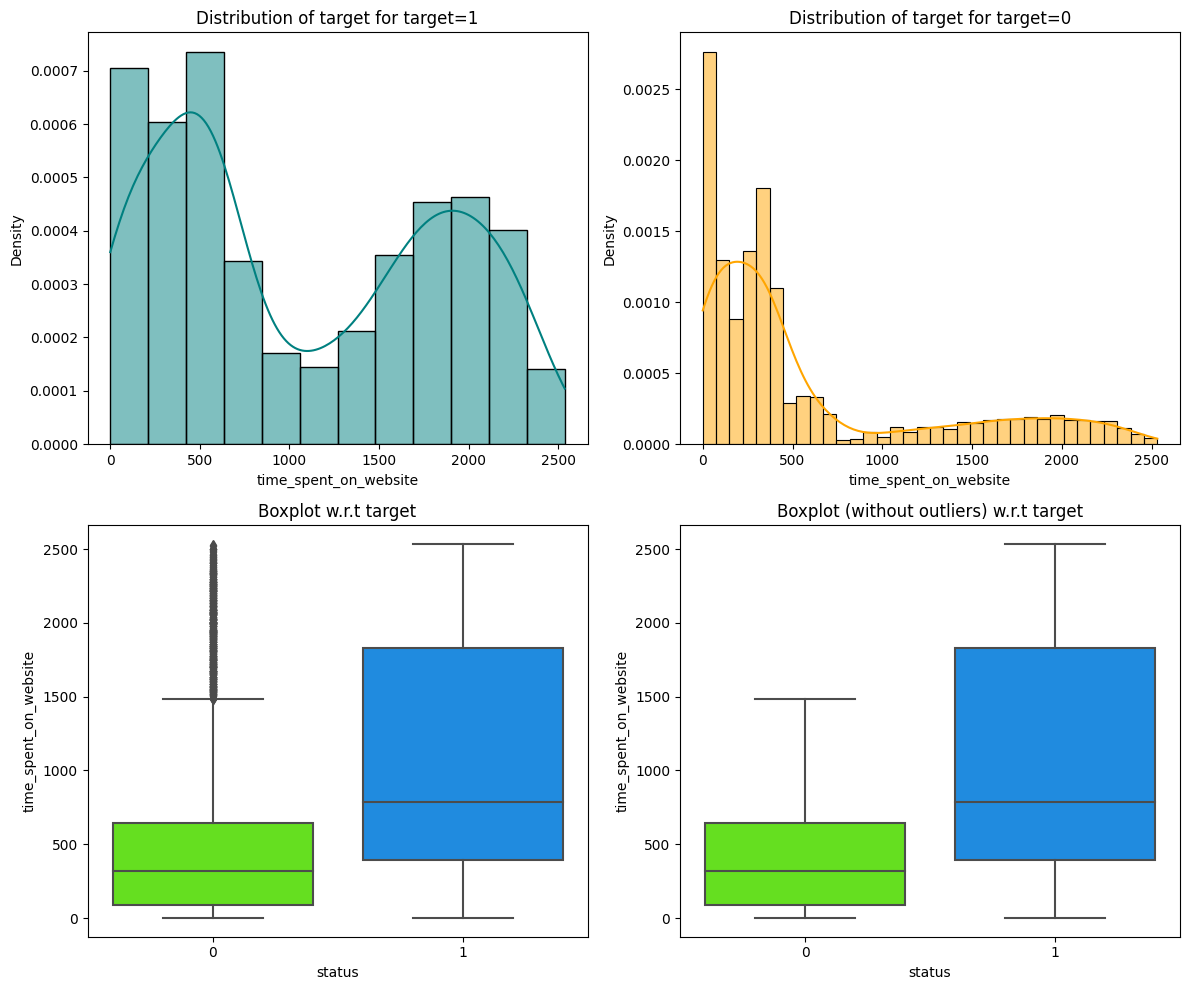

In [42]:
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

### observation:

Leads that invest a significant amount of time on the website generally show a higher tendency to be converted to paid customers. Nevertheless, there are instances where leads spending less time on the website also undergo successful conversion to paid customers.

In [43]:
# checking the median value
data.groupby(["status"])["time_spent_on_website"].median()

status
0   317.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

**Let's do a similar analysis for time spent on website and page views per visit.**

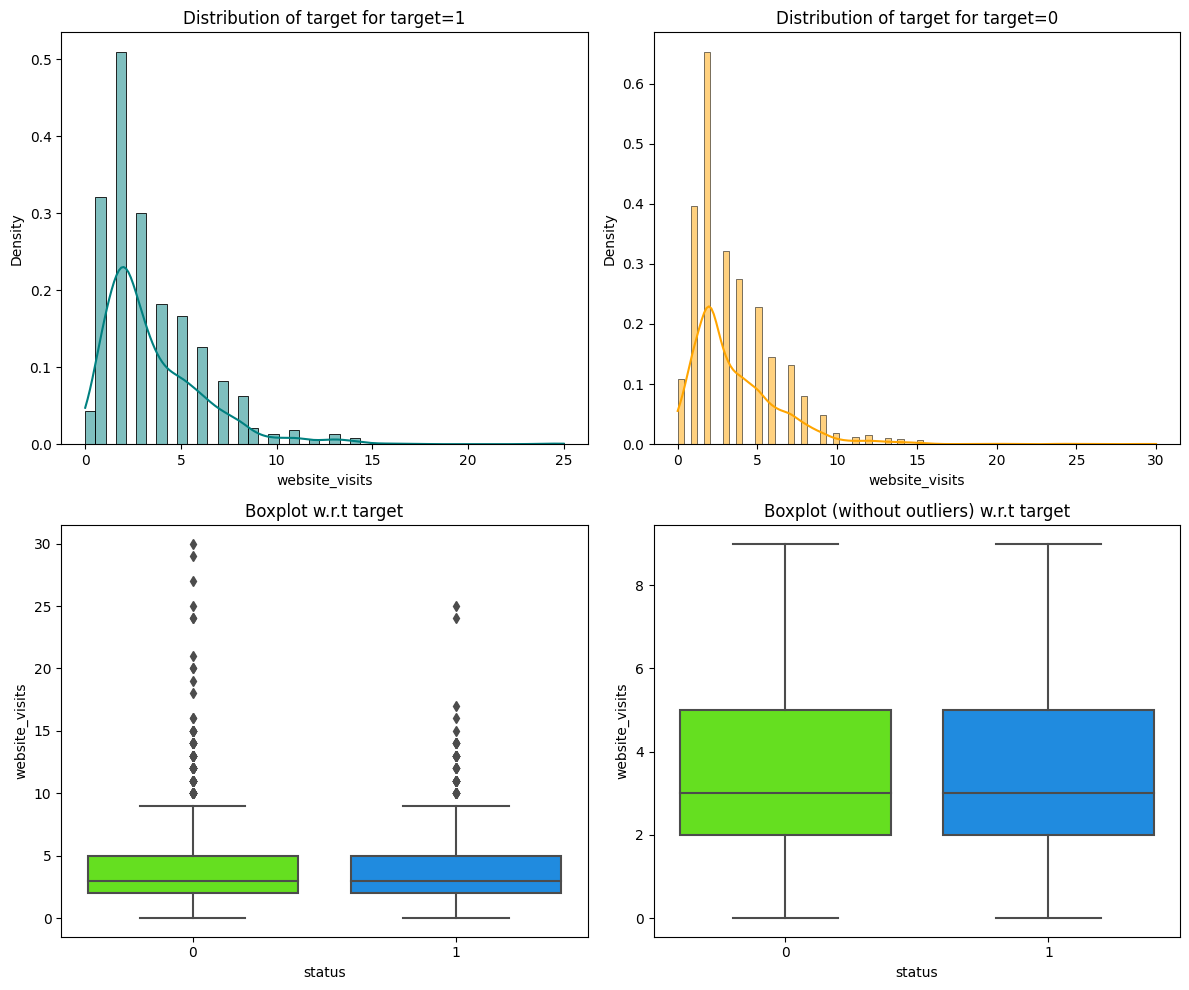

In [44]:
#distribution_plot_wrt_target(___________) # Complete the code to plot distribution for website_visits and status
distribution_plot_wrt_target(data, "website_visits", "status")

### observations:

The status of individuals who visited the website appears to be quite similar, with almost identical spread and median values.

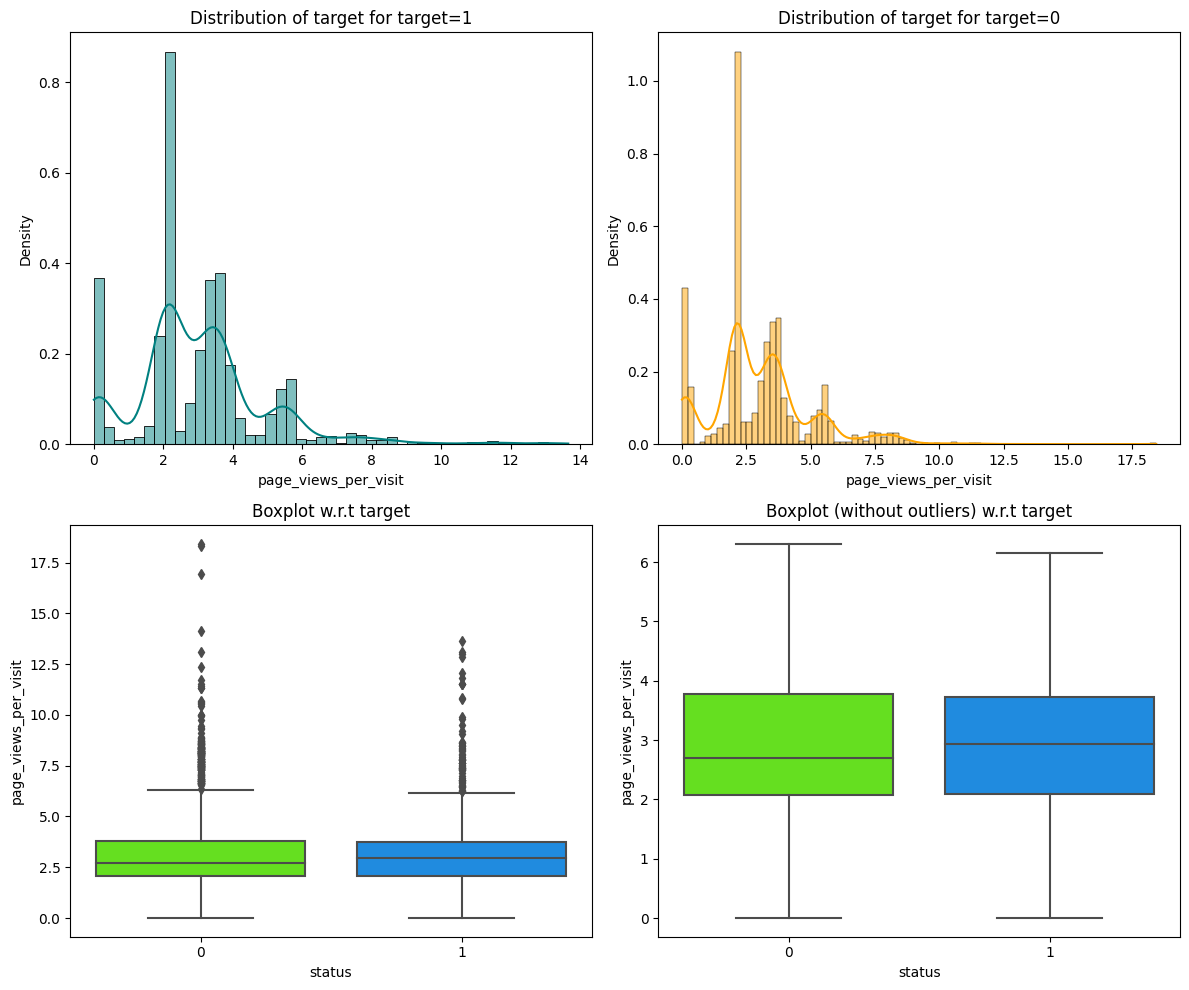

In [45]:
distribution_plot_wrt_target(data, "page_views_per_visit", "status")

### observations:

The status of page_views_per_visit appears to be quite similar, with almost identical spread and median values.

**People browsing the website or the mobile app are generally required to create a profile by sharing their personal details before they can access more information. Let's see if the profile completion level has an impact on lead status**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


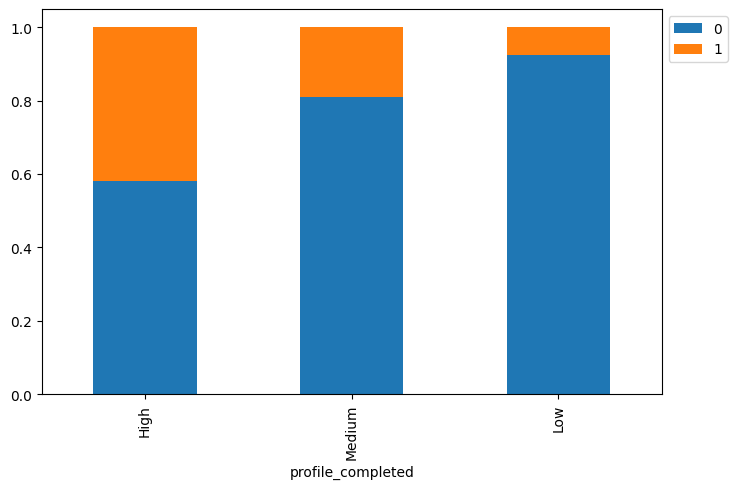

In [46]:
stacked_barplot(data, "profile_completed", "status")  # Complete the code to plot stacked_barplot for profile_completed and status

### observations:

Approximately 40% of leads categorized as having a high level of profile completion tend to convert into paid customers.

**After a lead shares their information by creating a profile, there may be interactions between the lead and the company to proceed with the process of enrollment. Let's see how the last activity impacts lead conversion status**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


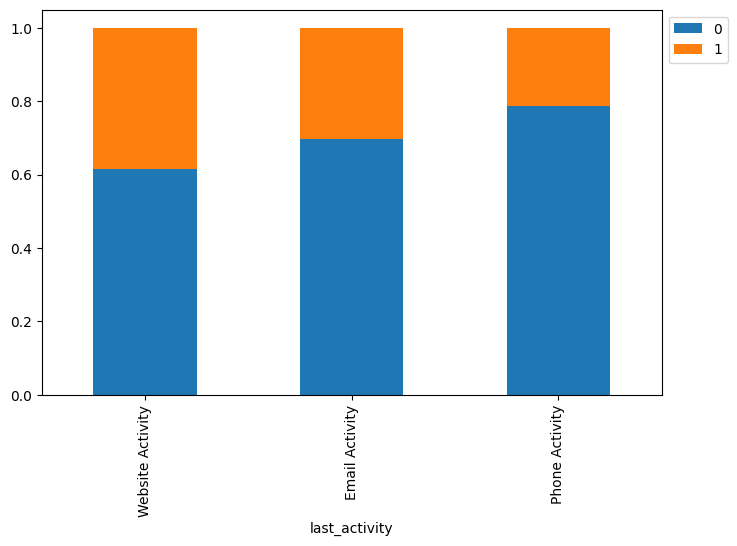

In [47]:
stacked_barplot(data, "last_activity", "status") # Complete the code to plot stacked_barplot for last_activity and status

### observations:

The impact of the last activity on lead conversion to enrollment exhibits a decreasing trend from Website Activity to Email Activity and Phone Activity. This suggests that those who interacted with ExtraLearn via the website are more likely to get enrolled.

**Let's see how advertisement and referrals impact the lead status**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


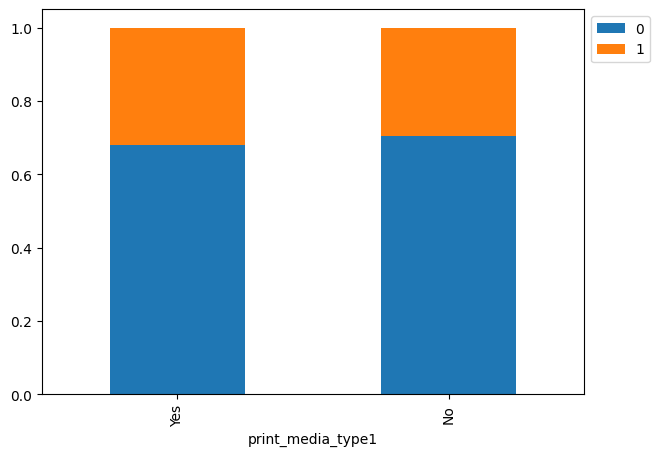

In [48]:
stacked_barplot(data, "print_media_type1", "status") # Complete the code to plot stacked_barplot for print_media_type1 and status

### observations:

There isn't a significant difference in the conversion status of leads based on whether they viewed the ad via print media type 1 (newspaper) or not.

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


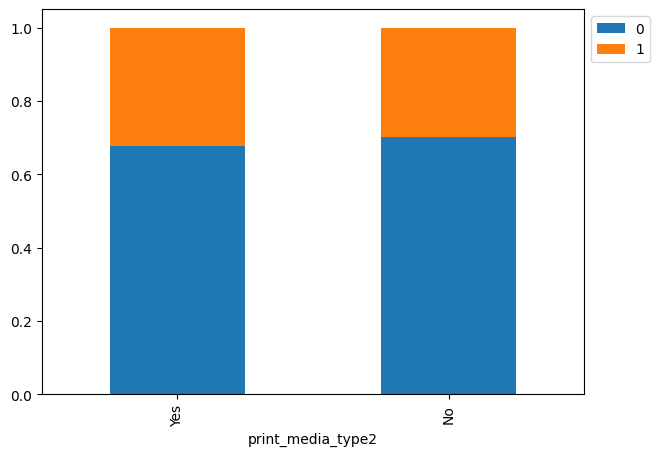

In [49]:
stacked_barplot(data, "print_media_type2", "status") # Complete the code to plot stacked_barplot for print_media_type2 and status

### observations:

There isn't a significant difference in the conversion status of leads based on whether they viewed the ad via print media type 2 (magazine) or not.

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


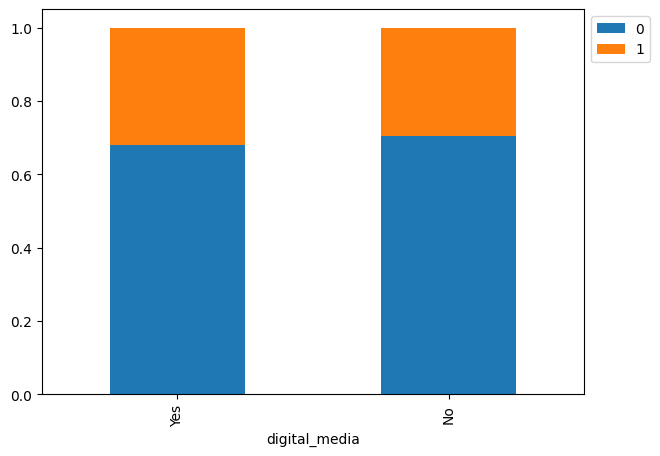

In [50]:
stacked_barplot(data, "digital_media", "status") # Complete the code to plot stacked_barplot for digital_media and status

### observations:

There isn't a significant difference in the conversion status of leads based on whether they viewed the ad via digital media or not.

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


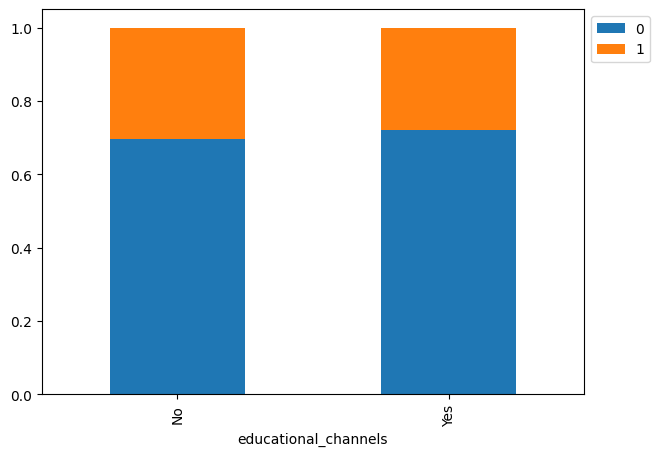

In [51]:
stacked_barplot(data, "educational_channels", "status") # Complete the code to plot stacked_barplot for educational_channels and status

### observations:

There isn't a significant difference in the conversion status of leads based on whether they viewed the ad via edicationals or not.

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


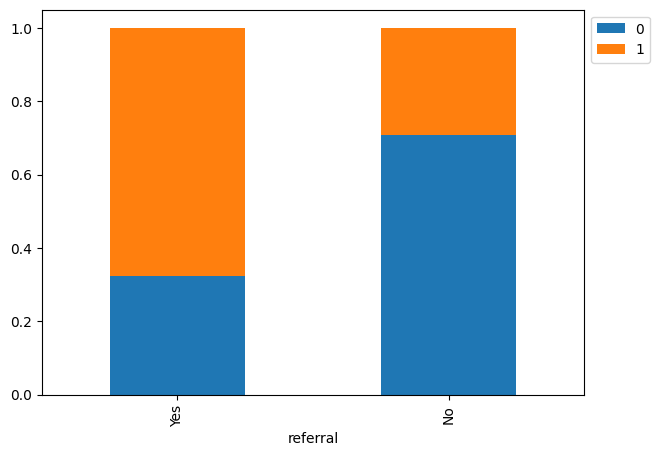

In [52]:
stacked_barplot(data, "referral", "status") # Complete the code to plot stacked_barplot for referral and status

### observations

Interestingly, individuals who were referred to the program tend to exhibit a higher conversion rate in terms of enrollment.

### Outlier Check

- Let's check for outliers in the data.

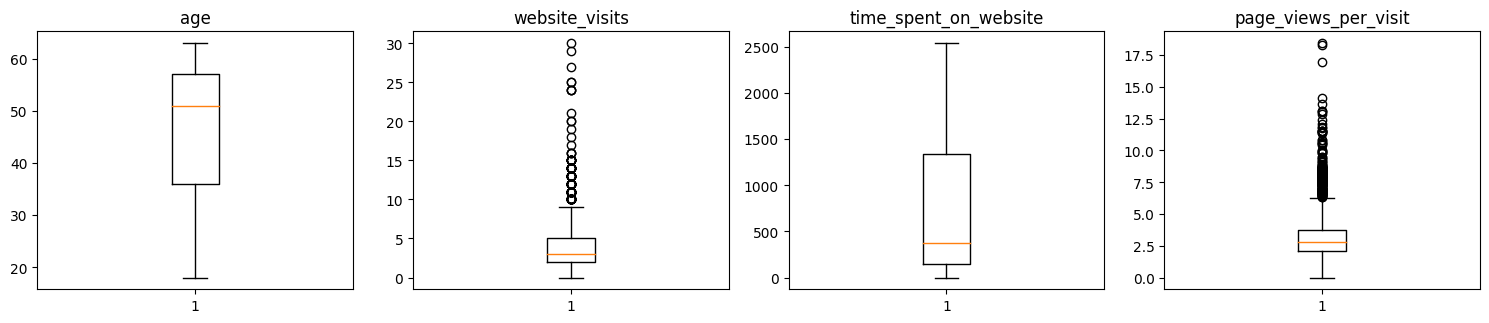

In [53]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### observations:

It's evident that the variables website_visits and page_views_per_visit display some degree of outliers within their respective datasets.

### **Finding the percentage of outliers, in each column of the data, using IQR.**

In [54]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3-Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (Q1-1.5 * IQR)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3+1.5 * IQR

In [55]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

age                     0.00000
website_visits          3.33912
time_spent_on_website   0.00000
page_views_per_visit    5.57242
status                  0.00000
dtype: float64

### observations:

The outliers observed in both website_visits and page_views_per_visit account for 3.3% and 5.6% of the total number of observations, respectively. Given that these percentages are below 10%, they may be considered negligible and can be disregarded.

## Data Preprocessing

- We want to predict which lead is more likely to be converted.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [56]:
X = data.drop(["status"], axis=1)
Y = data["status"]
X = pd.get_dummies(X, drop_first=True)
#X = X.astype(int)

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [57]:
X.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.86100,0,1,1,0,0,0,1,1,0,1,0,0
1,56,2,83,0.32000,0,0,0,0,1,0,1,0,0,0,1,0
2,52,3,330,0.07400,0,0,1,0,1,0,1,0,0,1,0,0
3,53,4,464,2.05700,0,1,1,0,0,0,1,0,0,0,0,0
4,23,4,600,16.91400,1,0,1,0,0,0,0,0,0,0,0,0


In [58]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
0   0.70415
1   0.29585
Name: status, dtype: float64
Percentage of classes in test set:
0   0.69509
1   0.30491
Name: status, dtype: float64


## **Building Classification Models**

#### Creating functions to calculate different metrics and confusion matrix.
* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [59]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

## Building a Decision Tree model

In [60]:
# Building decision tree model

d_tree= DecisionTreeClassifier(random_state=1,max_depth=8)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2273
           1       0.87      0.81      0.84       955

    accuracy                           0.91      3228
   macro avg       0.90      0.88      0.89      3228
weighted avg       0.91      0.91      0.91      3228



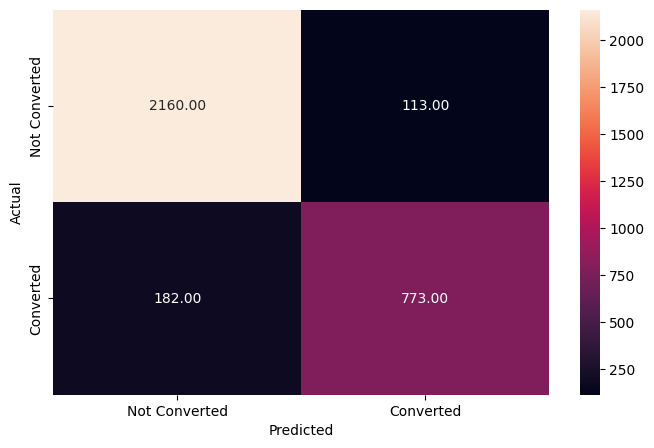

In [61]:
# Checking performance on the training dataset

y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

### Observation:
* Model has performed very well on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set. in this circumstance I applied a maximum deth of the tree to be 8.

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       962
           1       0.79      0.71      0.75       422

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



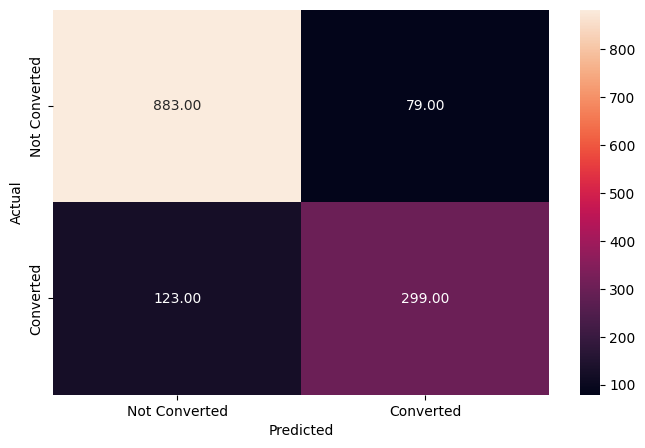

In [62]:
# Checking performance on the test dataset
y_pred_test1 = d_tree.predict(X_test)
metrics_score(y_test, y_pred_test1)

## Pruning the tree?

From the confusion metrics of the training and test results, it is evident that the training model is experiencing issues with overfitting and requires attention. To address this, tree pruning is necessary. In the subsequent step, GridSearch was applied to optimize the hyperparameters, aiming to find the best solution for the encountered overfitting issue.

In [63]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

### Checking model performance

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



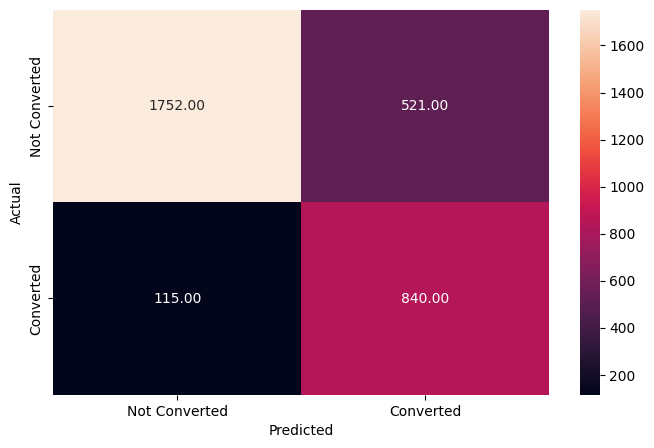

In [64]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_score(y_train, y_pred_train2)


              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



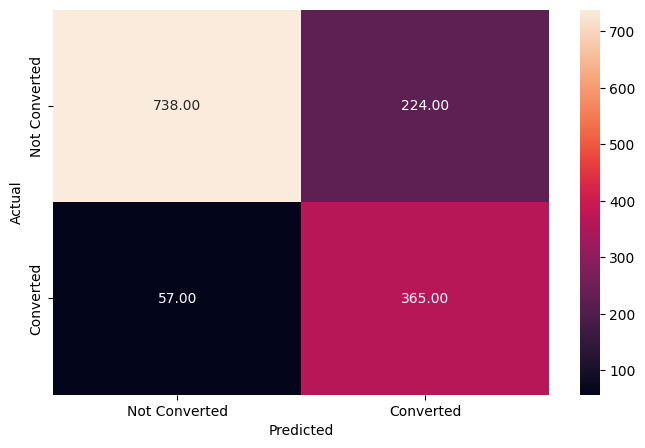

In [65]:
# Checking performance on the test data
y_pred_test2 = d_tree_tuned.predict(X_test)
metrics_score(y_test, y_pred_test2)

### observations:

Following the application of GridSearch optimization, it is apparent that both precision and recall values for both the training and testing models are similar. This suggests the development of a robust model that can be effectively utilized for the intended purpose.

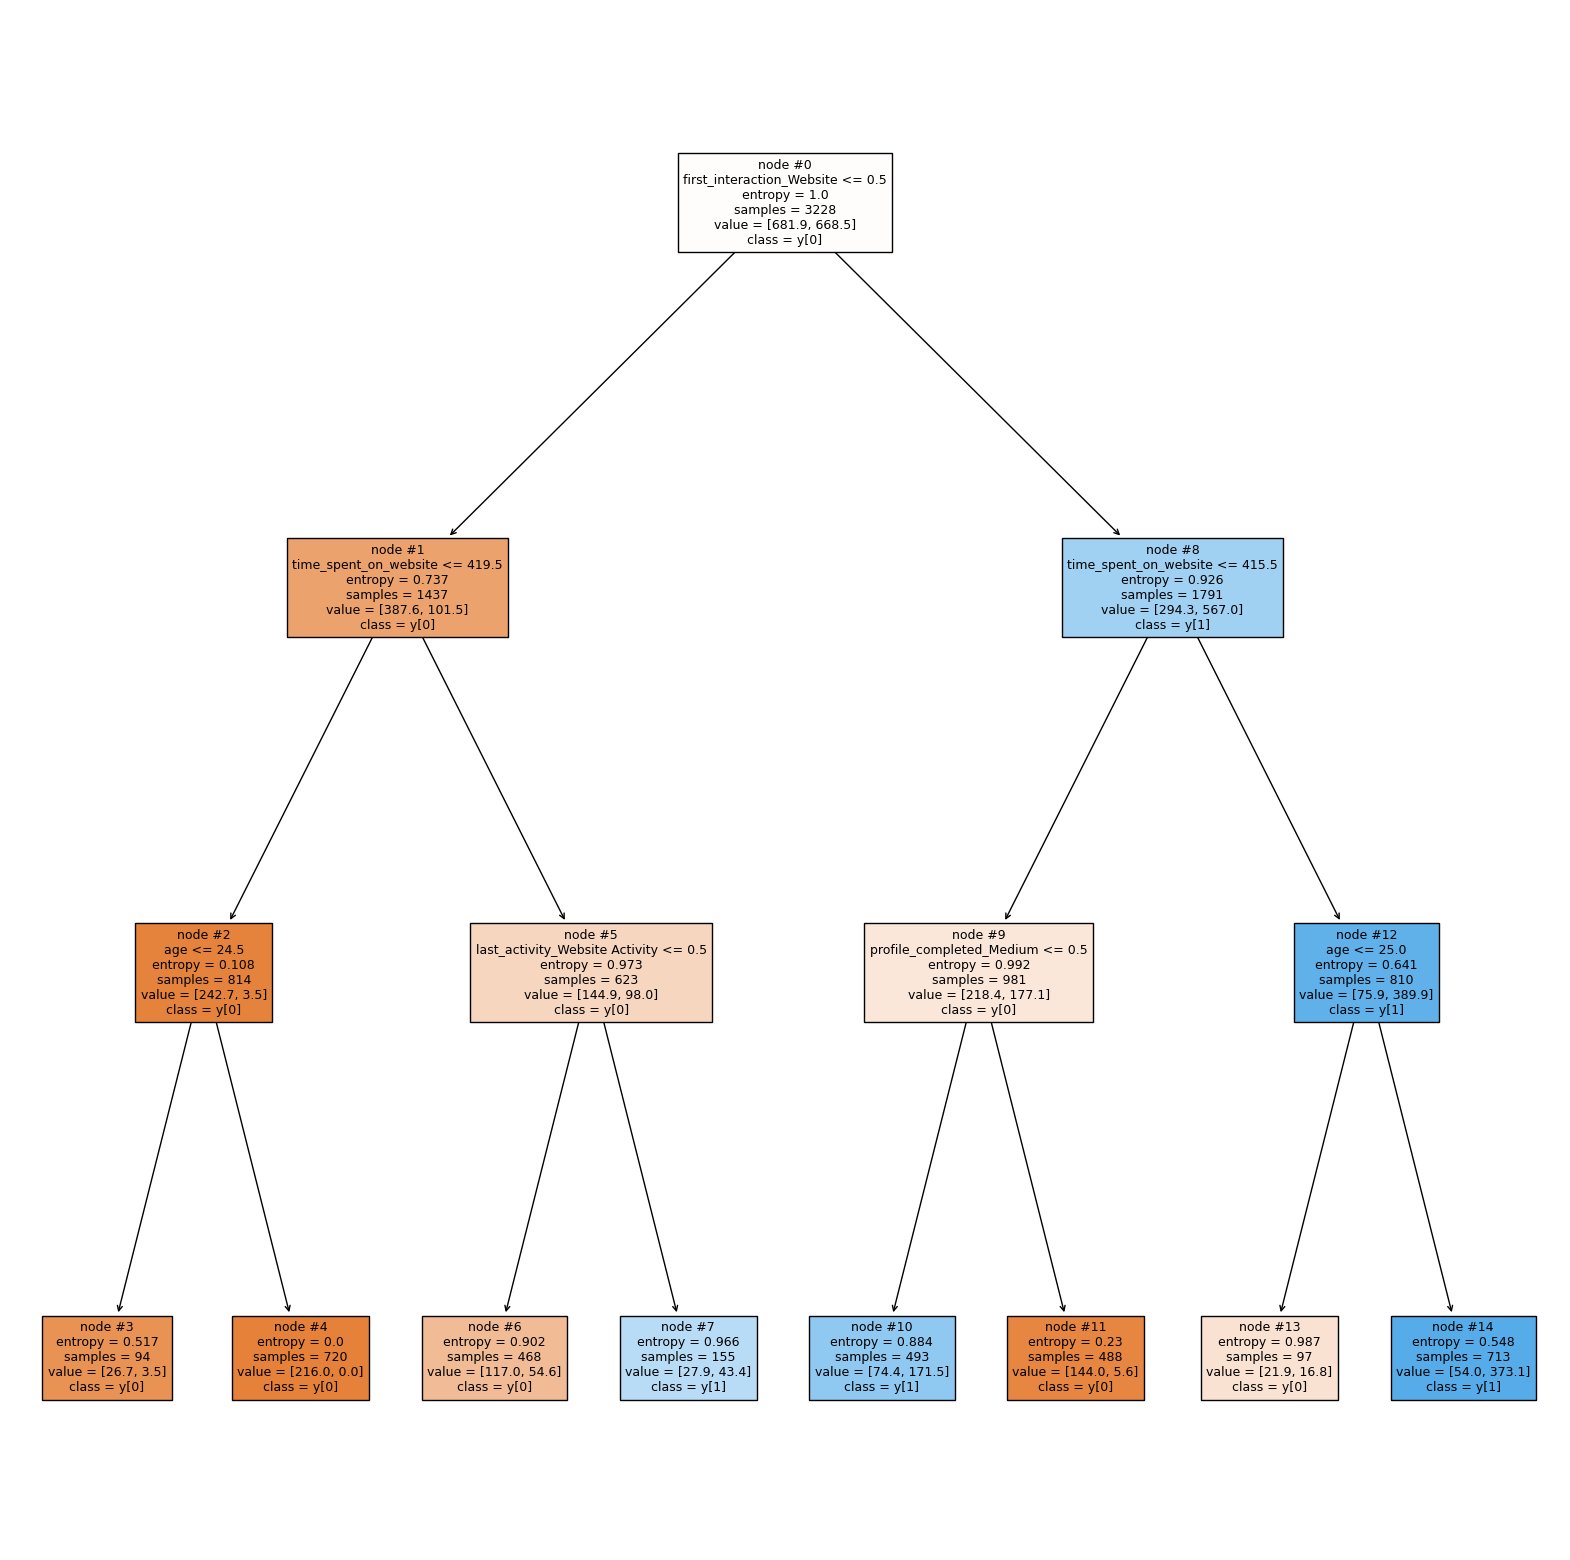

In [66]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

In [67]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.34814
first_interaction_Website      0.32718
profile_completed_Medium       0.23927
age                            0.06389
last_activity_Website Activity 0.02151
website_visits                 0.00000
page_views_per_visit           0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
last_activity_Phone Activity   0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


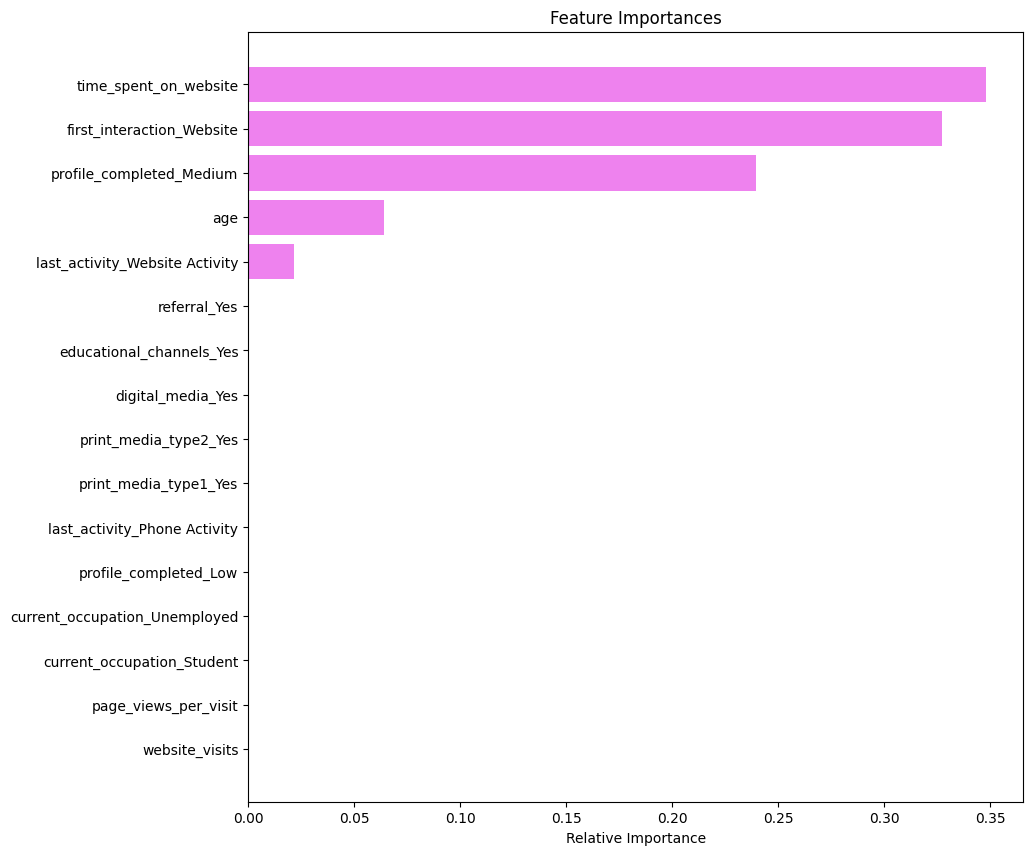

In [68]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### observations:

- **Time spent on the website** and **first_interaction_website** are the most important features followed by **profile_completed**, **age**, and **last_activity**.
- The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not.

## Building a Random Forest model

In [69]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



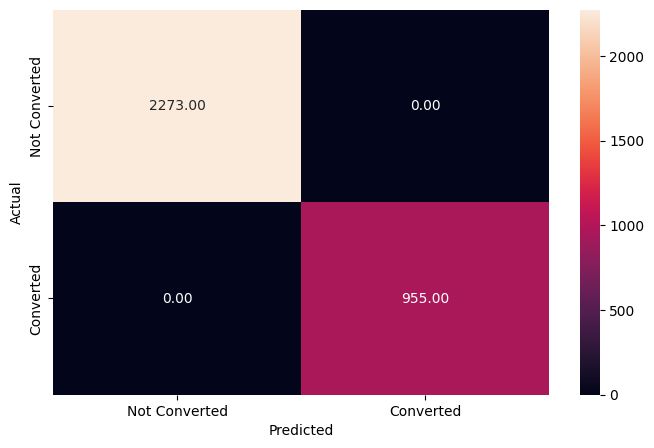

In [71]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

**Observation:**
* Model has performed very well on the training set.
* As we know a random forest is a type of a decision model which will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set. This required correction to reduce the overfiting problem in the model.

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       962
           1       0.78      0.68      0.73       422

    accuracy                           0.84      1384
   macro avg       0.82      0.80      0.81      1384
weighted avg       0.84      0.84      0.84      1384



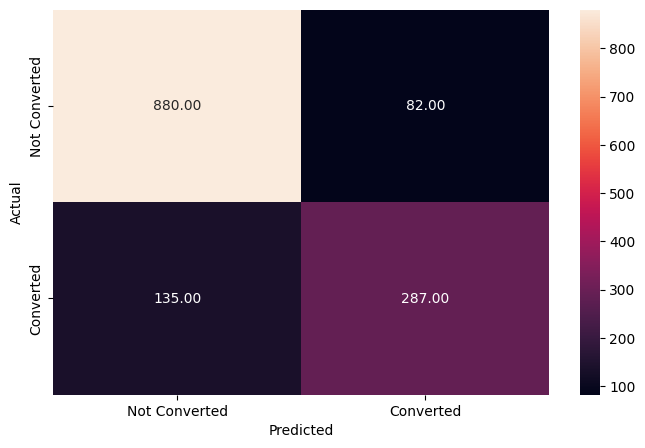

In [72]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

## Pruning the tree?

It's evident that the model did not perform well with the test data, indicating a need for pruning using other optimization algorithms, such as GridSearch. The recall on the training data was 1 and the testing data was 0.68 which is clearly a bad model

In [73]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
#grid_obj = __________________

#grid_obj = __________________

# Save the best estimator to variable rf_estimator_tuned
#rf_estimator_tuned = ________________

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



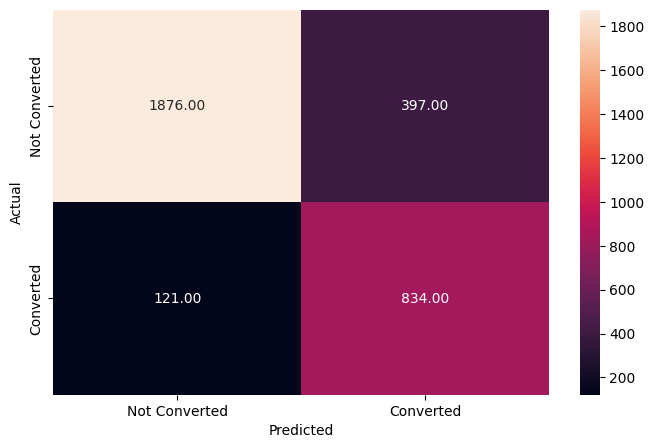

In [74]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train4)

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



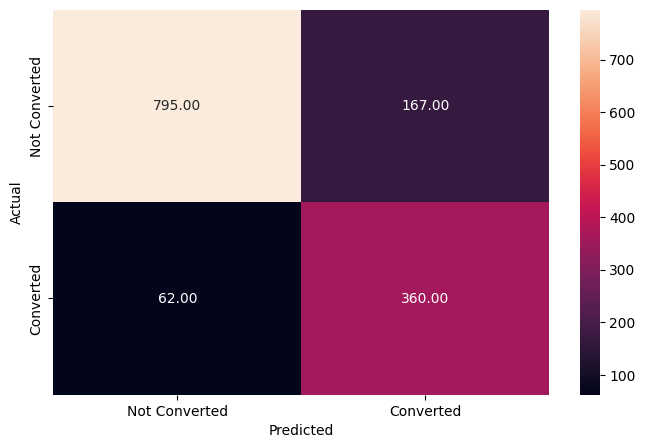

In [75]:
# Checking performance on the testing data
y_pred_test4 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test4)

### observations:

**Following the application of GridSearch optimization, it is apparent that both precision and recall values for both the training and testing data are similar.** The recall on the training data is 87 while in the testing data it was 85 which looks pretty good. **This suggests the development of a robust model that can be effectively utilized for the intended purpose.**

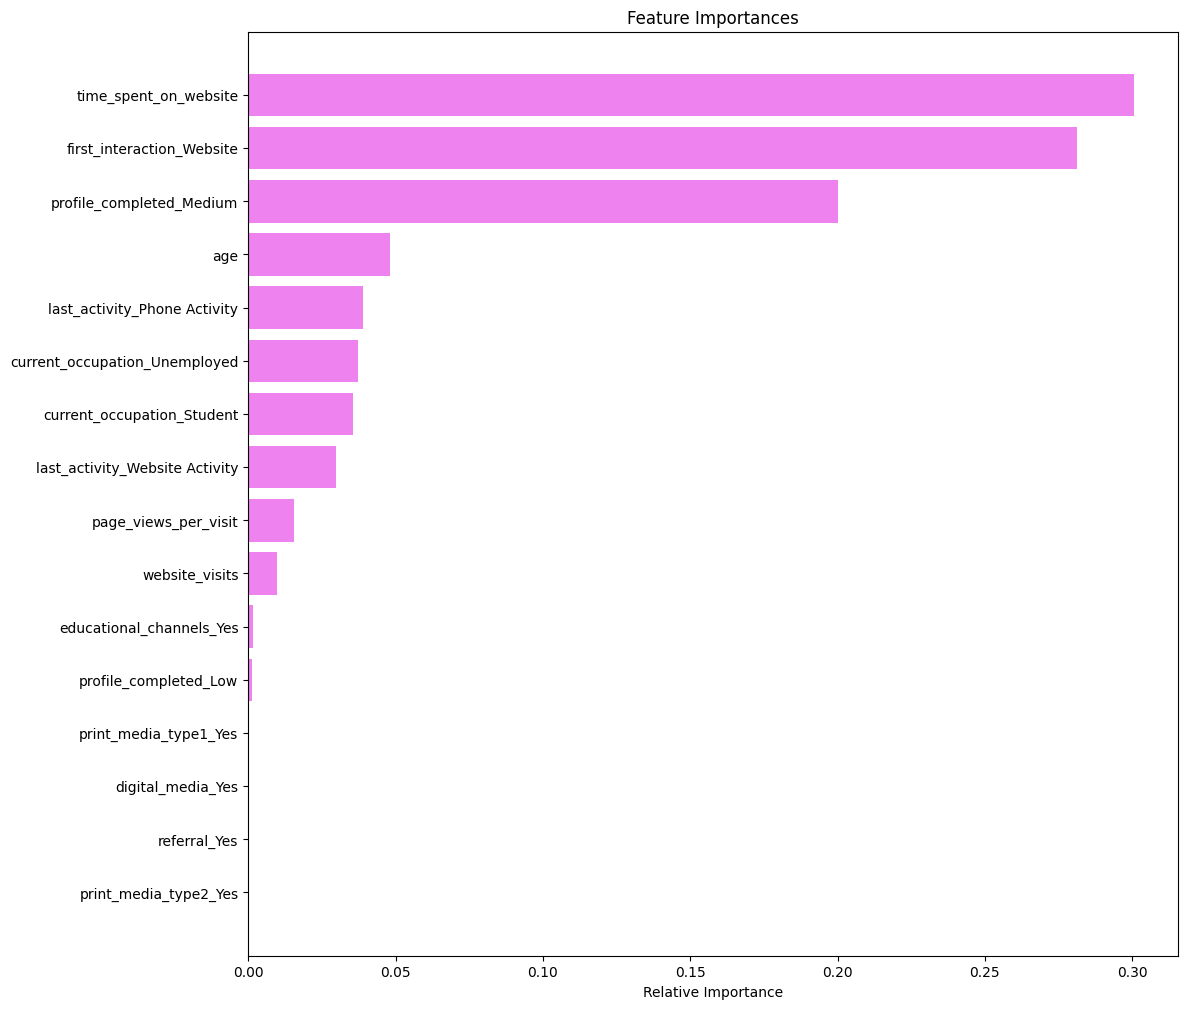

In [76]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### observations:

- Similar to the decision tree model, **time spent on website, first_interaction_website, profile_completed, and age are the top four features** that help distinguish between not converted and converted leads.
- Unlike the decision tree, **the random forest gives some importance to other variables like occupation, page_views_per_visit, as well.** This implies that the random forest is giving importance to more factors in comparison to the decision tree.

## **Conclusions and Recommendations:**

## **Conclusions:**

In summary, ExtraaLearn has an opportunity to enhance lead conversion by refining marketing strategies based on observed patterns, embracing digital channels, leveraging referrals, and prioritizing user engagement on the website. Continuous adaptation and data-driven decision-making will be key to the startup's success in a competitive education and upskilling market.

The analysis of the data allows for the following conclusions:

* ExtraaLearn attracts a diverse range of leads, including professionals, unemployed individuals, and students.
* The average age of 46 indicates a broad demographic, requiring tailored engagement strategies for different age groups.

* The website is the predominant interaction channel, with over half of the leads choosing it as their first point of contact.
* Email stands out as the primary mode of interaction, suggesting its effectiveness in lead engagement.

* Referrals play a significant role in lead conversion, showcasing the power of word-of-mouth in promoting ExtraaLearn's programs.

* Traditional advertising channels like newspapers and magazines show minimal impact, while digital platforms represent an underutilized opportunity.

* Professionals demonstrate a higher conversion likelihood, emphasizing the need to tailor marketing strategies based on the occupation of the leads.
User Engagement Correlation:

* Higher website engagement, measured by visits and time spent, correlates with increased conversion rates.
* The bimodal distribution of website visits suggests distinct user behaviors that should be further investigated.
* High profile completion emerges as a key driver for conversion, indicating the importance of detailed lead information.

* Machine learning models identify time spent on the website, first interaction via the website, profile completion, age, and last activity as influential factors in lead conversion.
* Regular model refinement and adaptation based on changing lead behavior is essential.

* The presence of outliers in website-related metrics suggests the need to investigate and potentially address these anomalies for a more accurate understanding of user behavior.

* Tailoring marketing strategies to specific segments, such as age groups and occupation categories, can optimize resource allocation and improve conversion rates.

* Customer feedback is crucial for understanding preferences and challenges, providing valuable insights for strategic decisions.




## **Recommendations:**

These recommendations aim to leverage observed patterns and insights to enhance lead conversion rates and improve the overall effectiveness of ExtraaLearn's strategies. Regular analysis and adaptation based on data-driven insights will contribute to the long-term success of the startup.

**Targeted Marketing:**
* Focus marketing efforts on professionals, given their higher conversion rate.
* Explore ways to increase engagement with students and optimize campaigns for this segment.

**Website Optimization:**
* Understand the bimodal behavior in website visits and tailor content or features accordingly.
* Enhance the user experience to encourage more visits and prolonged engagement.

**Referral Programs:**
* Strengthen referral programs to leverage the high conversion rates associated with referred leads.
* Incentivize existing customers or affiliates to refer more leads.

**Digital Advertising:**
* Considering the lower impact of traditional media, invest more in digital advertising.
* Optimize digital ad campaigns to reach a wider audience and improve visibility.

**Lead Profiling:**
* Prioritize leads with high profile completion, as it is a significant factor in conversion.
* Consider personalized engagement strategies based on occupation and demographic information.

**Data-Driven Decision-Making:**
* Continuously monitor and analyze data to adapt strategies based on changing lead behavior.
* Use machine learning models to predict and understand conversion patterns.

**User Engagement Strategies:**
* Develop strategies to keep leads engaged on the website, encouraging interaction and exploration.
* Implement targeted communication based on last interaction channels to improve lead engagement.

**Age Group Strategies:**
* Tailor marketing messages and program offerings based on the age group characteristics.
* Consider age-specific content and engagement strategies to appeal to diverse age ranges.

**Customer Feedback:**
* Collect feedback from leads to understand their preferences, challenges, and expectations.
* Use feedback to make informed decisions in product development, marketing, and user experience.